In [ ]:
import re

import nltk
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [ ]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
sns.set_theme()

In [ ]:
train_data = pd.read_csv('https://raw.githubusercontent.com/andabuinoschi/RN4NLP/main/dataset/train.tsv?token=GHSAT0AAAAAABQN7GJQYYVJ6AVGUVBZF4POYO4OZKA', sep='\t')
test_data = pd.read_csv('https://raw.githubusercontent.com/andabuinoschi/RN4NLP/main/dataset/test.tsv?token=GHSAT0AAAAAABQN7GJQVCM2OKXOCOVVLPTQYO4O2DQ', sep='\t')
valid_data = pd.read_csv('https://raw.githubusercontent.com/andabuinoschi/RN4NLP/main/dataset/valid.tsv?token=GHSAT0AAAAAABQN7GJR2UE6T7ISXDJZY2AKYO4OZ3A', sep='\t')

data = train_data \
  .append(test_data) \
  .append(valid_data) \
  .reset_index(drop=True) \
  .fillna("N/A")

In [ ]:
data

tweet_no  ...          tweet_link_path
0             1  ...                      N/A
1             2  ...                      N/A
2             3  ...                      N/A
3             4  ...                      N/A
4             5  ...                      N/A
...         ...  ...                      ...
14580      2552  ...                      N/A
14581      2553  ...  Point Coom status photo
14582      2554  ...                      N/A
14583      2555  ...                      N/A
14584      2556  ...             article html

[14585 rows x 17 columns]

Question 1

yes    5942
no     3161
Name: q1_label, dtype: int64


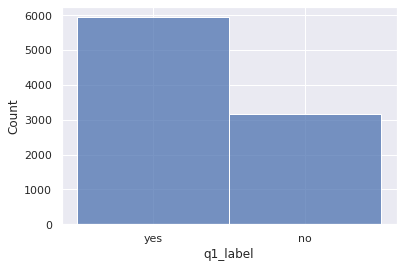

Question 2

no     5310
N/A    3222
yes     571
Name: q2_label, dtype: int64


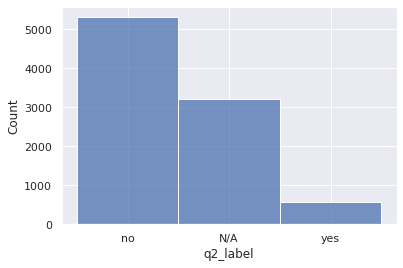

Question 3

yes    5810
N/A    3137
no      156
Name: q3_label, dtype: int64


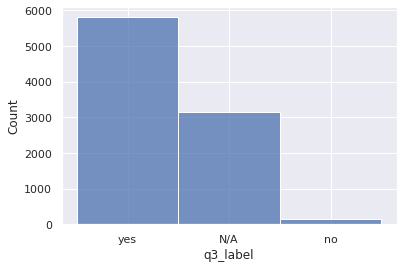

Question 4

no     5070
N/A    3158
yes     875
Name: q4_label, dtype: int64


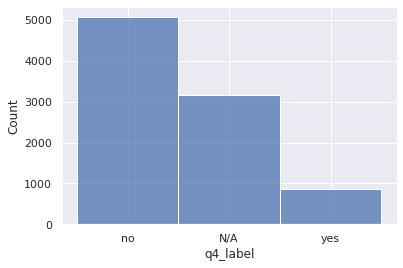

Question 5

no     4035
N/A    3138
yes    1930
Name: q5_label, dtype: int64


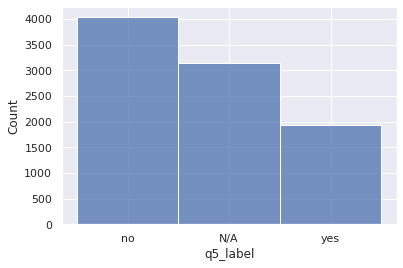

Question 6

no     7839
yes    1254
N/A      10
Name: q6_label, dtype: int64


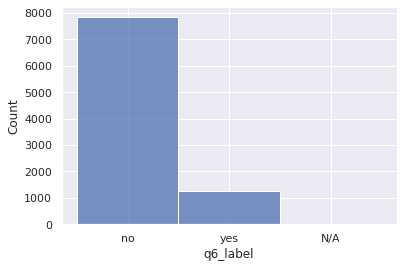

Question 7

no     5005
yes    4038
N/A      60
Name: q7_label, dtype: int64


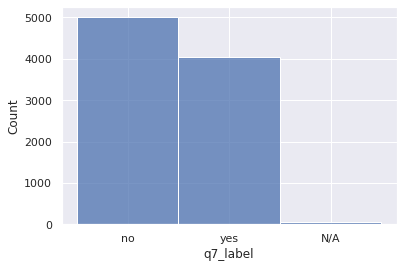

In [ ]:
for i in range(1, 8):
  print(f"Question {i}", end="\n\n")
  print(data[f"q{i}_label"].value_counts())

  sns.histplot(data=data, x=f"q{i}_label")
  plt.show()

# New Section

In [ ]:
print("Average number of characters per tweet:", data.tweet_text.apply(len).mean())
print("Average number of tokens per tweet:", data.tweet_text.apply(lambda tweet: len(word_tokenize(tweet))).mean())

Average number of characters per tweet: 189.48412611227067
Average number of tokens per tweet: 34.75063165989234


In [ ]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 2000)
pd.set_option('display.float_format', '{:20,.2f}'.format)
pd.set_option('display.max_colwidth', None)

In [ ]:
print("Tokens frequencies:", end="\n\n")
pd.Series(np.concatenate([word_tokenize(tweet) for tweet in data.tweet_text])).value_counts()

Tokens frequencies:



the                                                                                                             16660
:                                                                                                               10214
#                                                                                                                9328
,                                                                                                                9126
of                                                                                                               8441
https                                                                                                            7750
.                                                                                                                6748
and                                                                                                              6621
to                                                      

In [ ]:
print("Tokens frequencies excluding non alpha numeric tokens:", end="\n\n")
pd.Series(np.concatenate([[word for word in word_tokenize(tweet) if word.isalnum()] for tweet in data.tweet_text])).value_counts()

Tokens frequencies excluding non alpha numeric tokens:



the                                                                          16660
of                                                                            8441
https                                                                         7750
and                                                                           6621
to                                                                            6217
in                                                                            5013
vaccine                                                                       4289
a                                                                             4009
is                                                                            3484
for                                                                           3204
Corona                                                                        2468
The                                                                           2280
with

In [ ]:
print("Tokens frequencies excluding stop words and non alpha numberic tokens:", end="\n\n")

stopwords_list = stopwords.words()
pd.Series(np.concatenate([[word for word in word_tokenize(tweet) if (word.isalnum() and word not in stopwords_list)] for tweet in data.tweet_text])).value_counts()

Tokens frequencies excluding stop words and non alpha numberic tokens:



https                                                                        7750
vaccine                                                                      4289
Corona                                                                       2468
The                                                                          2280
I                                                                            1290
virus                                                                        1194
vaccines                                                                     1193
first                                                                         969
quot                                                                          937
coronavirus                                                                   917
39                                                                            894
people                                                                        874
new             